### Support vector machine
* hay veces que la representacion graficas de los puntos (por ejemplo centrifuga), para encontrar cluster, es complicada y no es facil de resolver con los modelos antes vistos (kmeans, arboles,..)
* cuando tenemos por ejemplo muchas dimensiones (features)
* aqui utilizan matematicas mas avanzadas; es algoritmo de aprendizaje supervisado tanto para clasificacion como regresion
* en una clasificacion , donde tengamos dos ejes x e y, dos clases puntos (rojos y azules) el algoritmo buscara el hiperplano separador (siempre que exista ¡¡) entre los puntos que maximize la distancia entre ellos y cada grupo (recordar imagen del curso)

### el problema del clasficador no optimo de vector machine
* a veces pasas que las clases no son separables por un hiperplano (ejemplo hay puntos en ambas partes del corredor (recordar rectas separadas) de ambas clases)
* tambien podemos resolver con un plano  que no sea lineal para la separacion, utilizando diferentes kernels (polinomial, radial,red neuronal)
* la eleccion del kernel, el numero de vectores que tendran parte en el sopote,tendra un rol importante (que la separacion de los grupos sea claro con el menor numeros de vectores)

### Linear support vector clasifier

In [1]:
# este es el mas sencillo (intenta encajar los puntos que les demos intentando categorizarlos y separarlos con un hiperplano)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm

In [5]:
# vamos a ver un pequeño ejemplo para ver como funciona en 2D
X = [1,5,1.5,8,1,9]
Y = [2,8,1.8,8,0.6,11]

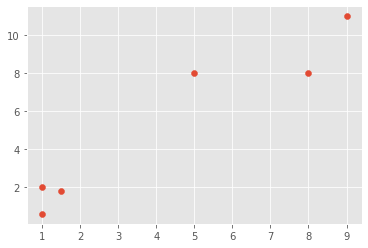

In [6]:
plt.scatter(X,Y)

In [7]:
data = np.array(list(zip(X,Y)))
data

array([[ 1. ,  2. ],
       [ 5. ,  8. ],
       [ 1.5,  1.8],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

In [8]:
# vamos a crear los targets (recordar que es un modelo supervisado)
target = [0,1,0,1,0,1]

In [9]:
# creamos el modelo: usamos kernel linea ya que queremos un hiperplano en 2d, o sea una recta; c= este es como de mal queremos que clasifique (ver mas info sobre este punto,donde todavia no esta muy claro , segun el profe :))
classifier = svm.SVC(kernel="linear",C=1.0)
classifier.fit(data,target)

SVC(kernel='linear')

In [10]:
data.shape

(6, 2)

In [14]:
# hacemos una prediccion de un punto random (hay que hacer un reshape porque tiene dos dimensiones ver shape)
p = np.array([0.57,0.67]).reshape(1,2)
print(p)
classifier.predict(p)

[[0.57 0.67]]


array([0])

* Modelo w0.x + w1.y + e = 0 (cuando despejamos queda la ecuacion de abajo)
* Ecuacion del hiperplano en 2D: y = a * x + b

In [15]:
# vamos hacer la representacion grafica, primero sacamos los pesos para las categorias 0 y 1
w = classifier.coef_[0]
w

array([0.1380943 , 0.24462418])

In [16]:
# calculamos la pendiente de la recta
a = -w[0]/w[1]
a

-0.564516129032258

In [17]:
# ahora la ordenada al origen ( intercep)
b = - classifier.intercept_[0]/w[1]
b

6.734677437813051

In [18]:
# creamos la recta
xx = np.linspace(0,10)
yy = a * xx + b

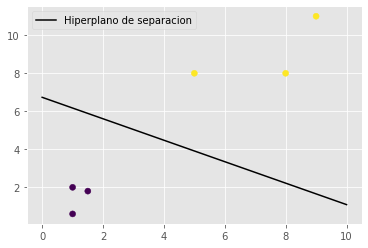

In [19]:
plt.plot(xx,yy,"k-",label="Hiperplano de separacion")
plt.scatter(X,Y,c=target)
plt.legend()

In [20]:
### Support vector machine
import seaborn as sns
from scipy import stats
sns.set()

In [ ]:
### el problema de la separacion

In [21]:
from sklearn.datasets.samples_generator import make_blobs

In [27]:
# vamos a crear una distribucion de puntos con dos cluster
X, Y = make_blobs(n_samples=50,centers=2,cluster_std=0.6,random_state=0)

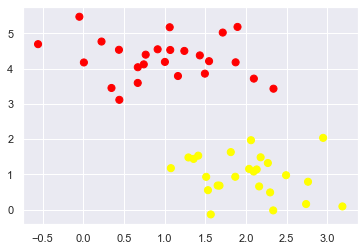

In [28]:
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")

(-1.0, 3.5)

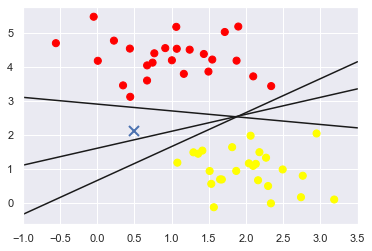

In [32]:
# vamos a generar un punto dificil de clasificar 
xx = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
plt.plot([0.5],[2.1],'x',color="b",markeredgewidth=2,markersize=10)

# en principio parece que pertence a los rojos, pero segun que recta tracemos puede que no
for a,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    yy = a * xx + b
    plt.plot(xx,yy,"-k")
plt.xlim(-1,3.5)

### Los soportes del SVM

(-1.0, 3.5)

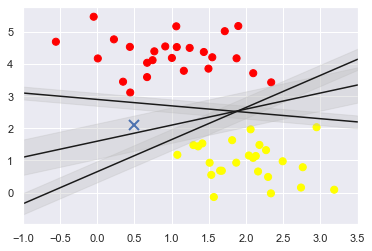

In [33]:
# porque entonces no pintamos un pasillo bien ancho hasta encontrar el primer punto de cada grupo ( el modelo svm tiende a la maximizacion del margen; los support vectors serian los limites , cuando encuentrarn el primer punto de cada grupo. a partir de esos puntos el algoritmo clasifica)

 
xx = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
plt.plot([0.5],[2.1],'x',color="b",markeredgewidth=2,markersize=10)


for a,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yy = a * xx + b
    plt.plot(xx,yy,"-k")
    plt.fill_between(xx, yy-d, yy+d, edgecolor="none",color="#BBBBBB",alpha=0.3)
plt.xlim(-1,3.5)

In [ ]:
### Indicar fronteras no lineales
* cuando el modelo da todo de si es cuando la separacion no es lineal; pensemos en distribuciones circulares, como hemos vistos en otros graficos; una recta no seria una solucion buena; una idea es aumentar las dimensiones (pensemos en 3D) y hay podemos establecer la division (por ejemplo arriba y abajo)
* ver notebooks profesor para ver graficos